# Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud=pd.read_csv("D:/Datasets/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


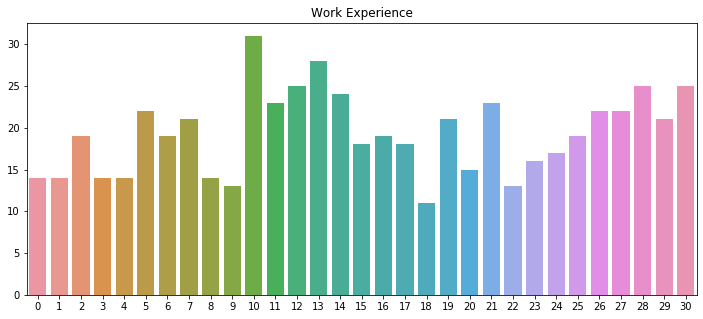

In [5]:
label=fraud["Work.Experience"].value_counts(ascending=False).keys().tolist()
values=fraud['Work.Experience'].value_counts(ascending=False).tolist()
plt.subplots(figsize=(12,5))
sns.barplot(x=label,y=values)
plt.title("Work Experience")
plt.show()

In [6]:
def inc(x):
    if x>=30000:
        return "Good"
    else:
        return "Risky"
    

In [7]:
fraud['income']=fraud['Taxable.Income'].map(inc)

In [8]:
fraud.drop('Taxable.Income',axis=1,inplace=True)

In [9]:
fraud.loc[fraud['income']=="Risky"]

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
10,NO,Single,102602,19,YES,Risky
12,NO,Divorced,148033,14,YES,Risky
16,YES,Divorced,34551,29,NO,Risky
19,NO,Single,126953,30,YES,Risky
21,YES,Divorced,29106,7,YES,Risky
...,...,...,...,...,...,...
544,NO,Single,133877,21,YES,Risky
557,YES,Married,157421,10,NO,Risky
567,YES,Single,129912,30,NO,Risky
575,NO,Divorced,95975,13,YES,Risky


In [10]:
#fraud["income"]="<=30000"
#fraud.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
#fraud.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

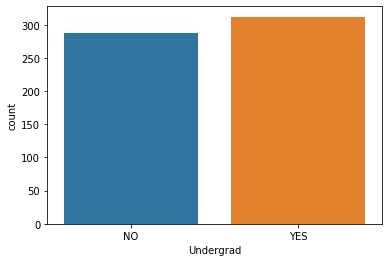

In [11]:
sns.countplot(fraud['Undergrad'])

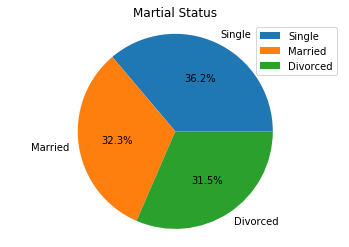

In [12]:
names=fraud['Marital.Status'].value_counts().keys().tolist()
values_=fraud['Marital.Status'].value_counts().tolist()
labels_=names
size=values_
fig1,ax1=plt.subplots()
ax1.pie(size,labels=labels_,autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Martial Status')
plt.legend()
plt.show()

In [13]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'income'],
      dtype='object')

In [14]:
fraud=fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"maritalstat","City.Population":"CityPopu","Work.Experience":"workExp","Urban":"urban","income":"income"})

In [15]:
#converting catergotical columns into dummy.
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in fraud.columns:
    if fraud[i].dtype==object:
        fraud[i]=enc.fit_transform(fraud[i])
    else:
        pass

In [16]:
X=fraud.iloc[:,0:5]
Y=fraud.iloc[:,5]
X

,undergrad,maritalstat,CityPopu,workExp,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,stratify= Y)

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

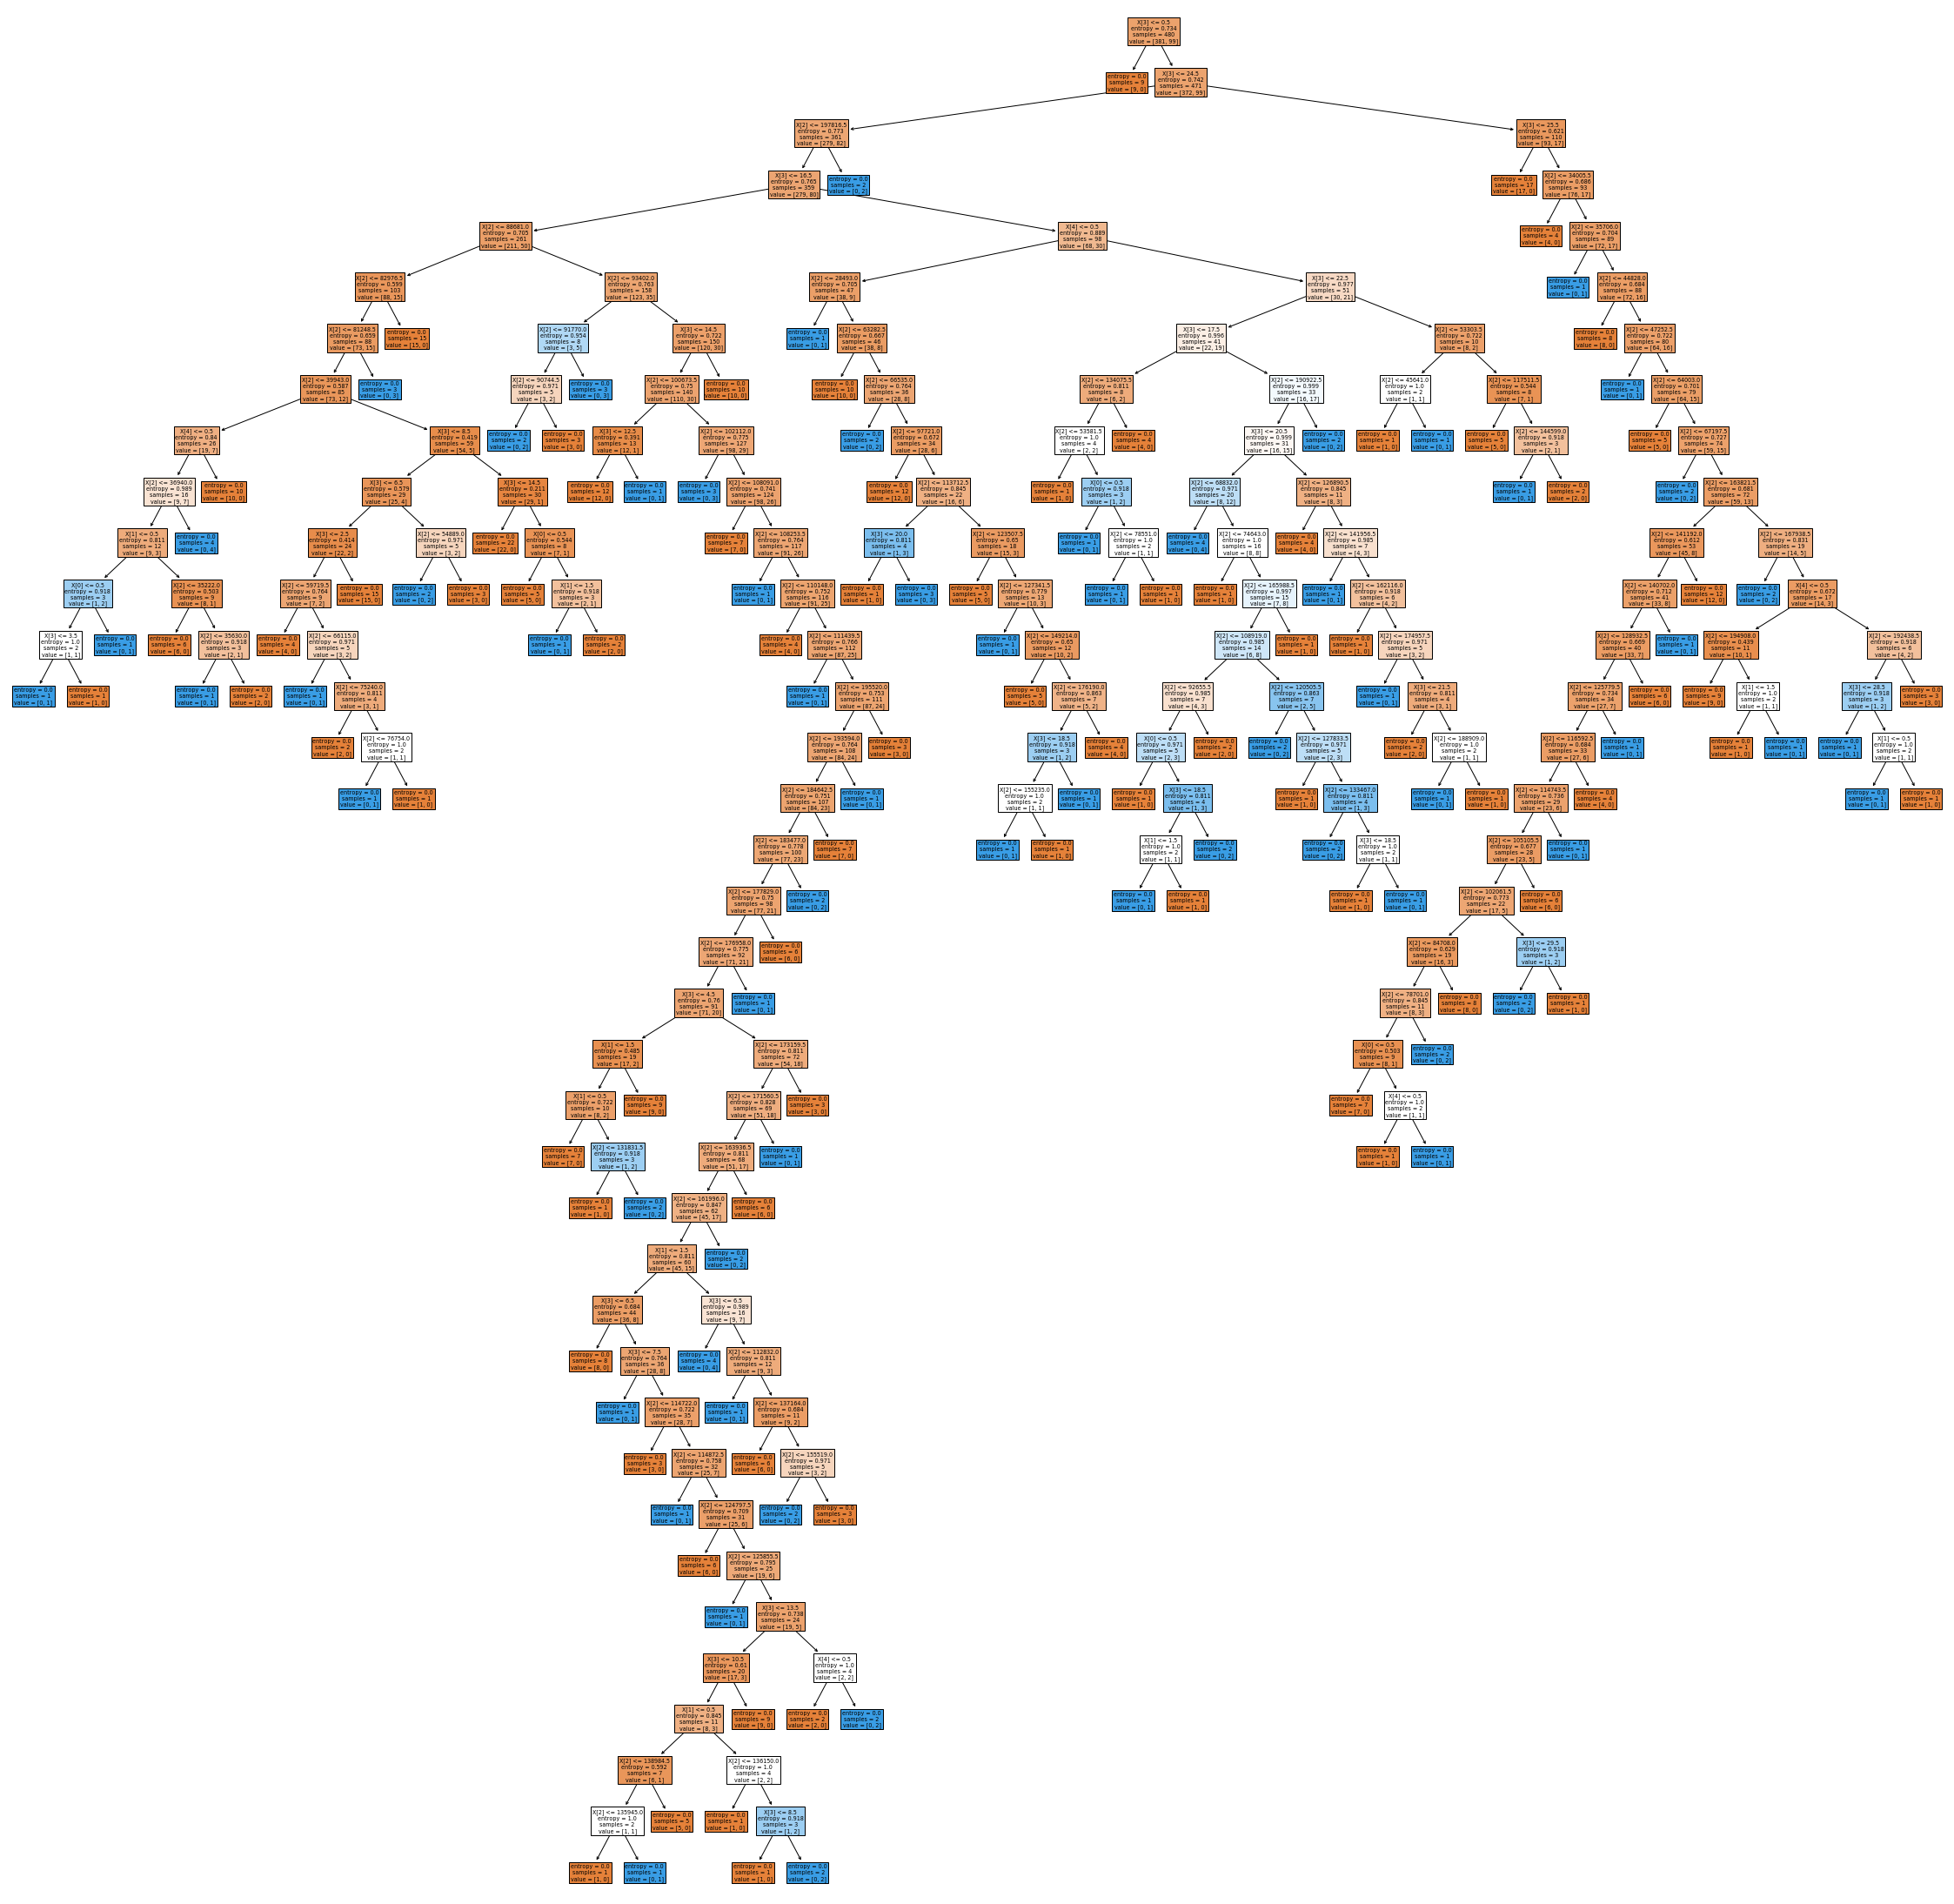

In [19]:
from sklearn import tree
fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(model,
                   filled=True)

In [20]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_3 <= 24.50
|   |   |--- feature_2 <= 197816.50
|   |   |   |--- feature_3 <= 16.50
|   |   |   |   |--- feature_2 <= 88681.00
|   |   |   |   |   |--- feature_2 <= 82976.50
|   |   |   |   |   |   |--- feature_2 <= 81248.50
|   |   |   |   |   |   |   |--- feature_2 <= 39943.00
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 36940.00
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_2 >  36940.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

In [21]:
pred=model.predict(x_train)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,pred)
print(accuracy)

1.0


In [22]:
pred_test=model.predict(x_test)
acc_test=accuracy_score(y_test,pred_test)
print(acc_test)

0.625


# Random_Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
rc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [27]:
rc.oob_score_

0.7145833333333333

In [30]:
pre_train=rc.predict(x_train)
acc_rtrain=accuracy_score(pre_train,y_train)
acc_rtrain

0.9895833333333334

In [31]:
pre_test=rc.predict(x_test)
acc_rtest=accuracy_score(pre_test,y_test)
acc_rtest

0.7416666666666667